## Q1 Decision Tree Algorithms (SECOM dataset)
(40%) Decision Tree Algorithms Use Python to solve the problem. The SECOM (Semiconductor Manufacturing) dataset, consists of manufacturing operation data and the semiconductor quality data. It contains 1567 
observations taken from a wafer fabrication production line. Each observation is a vector of 590 sensor measurements plus a label of pass/fail test. Also, there are only 104 fail cases which are labeled as positive (encoded as 1: bad), whereas much larger amount of examples pass the test and are labeled as negative (encoded as -1: good). The dataset can be collected from UCI machine learning repository. 

#### (a) (5%) Construct a data science framework and show the data summary
DataScience Framework

1.   定義要面臨的問題，提出解決方法和目標
2.   收集資料，釐清每個欄位的含意、邏輯關係以及欄位的類型/值域
3.   分析欄位特徵或資料EDA，針對資料進行合適前處理
4.   選用數個符合目標和資料型態的模型進行分析，並使用驗證資料集做模型的效能評估
5.   比較模型間的績效，評比模型適配性，最後提出改善建議


In [ ]:
# ! pip install openpyxl

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [17]:
df = pd.read_excel('./MDS_Assignment3_SECOM.xlsx',sheet_name='secom',index_col='Unnamed: 0')
df.head(3)

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
2,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
3,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00


In [5]:
df['Label'].value_counts()

-1    1463
 1     104
Name: Label, dtype: int64

In [2]:
# 特徵名稱已被隱藏，只能explore數值關係
# Label: 1 or -1
# Time: 日期字串
df.describe()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


#### (b) (5%) What is the problem about the dataset? Any identical column? Any redundant column? Any missing value? How to handle these issues?

- 檢查重複 columns: 有 104 個欄位的值都是 0 or NaN，故刪除

In [18]:
duplicate_col = df.T.duplicated()
print(duplicate_col.value_counts())

# 把重複的 columns 抓出來看
cols = duplicate_col[duplicate_col==True]
df_dup = df[cols.index]
display(df_dup.head(3))
print('sum of duplicate columns: ', df_dup.sum(axis=0).sum())

False    488
True     104
dtype: int64


,Sensor_150,Sensor_180,Sensor_187,Sensor_190,Sensor_192,Sensor_193,Sensor_194,Sensor_195,Sensor_227,Sensor_230,...,Sensor_530,Sensor_531,Sensor_532,Sensor_533,Sensor_534,Sensor_535,Sensor_536,Sensor_537,Sensor_538,Sensor_539
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


sum of duplicate columns:  0.0


In [23]:
# Drop duplicate columns
# 591 - 104 + 1 = 488
# df = df.T.drop_duplicates(keep='first').T # 同義
df.drop(cols.index, axis=1, inplace=True)
print('columns after drop identical column: ', df.shape[1])

columns after drop identical column:  488


- 檢查重複 rows: 無

In [24]:
dup_index = df[df.duplicated()==True]
dup_index.index

Int64Index([], dtype='int64')

- 檢查 missing value: 刪除 > 70% 的欄位

Total missing value rate is 5.39%. (41225 out of 764696)
Sensor_86 has missing rate of 85%
Sensor_158 has missing rate of 91%
Sensor_159 has missing rate of 91%
Sensor_221 has missing rate of 85%
Sensor_293 has missing rate of 91%
Sensor_294 has missing rate of 91%
Sensor_359 has missing rate of 85%
Sensor_493 has missing rate of 85%


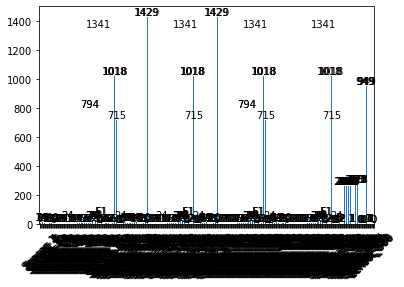

In [39]:
numOfNanCell = df.isnull().sum().sum()
numOfTotalCall = df.shape[0]*df.shape[1]
missRate = numOfNanCell / numOfTotalCall
print(f"Total missing value rate is {100*missRate:.2f}%. ({numOfNanCell} out of {numOfTotalCall})")

missing_vals = df.isnull().sum()
[m//len(df) for m in missing_vals]

# df.isnull().sum().plot(kind='bar')
ax = df.isnull().sum().plot.bar(rot=45)
for container in ax.containers:
    ax.bar_label(container)

missing_vals = df.isnull().sum()
missing_vals = [m*100//len(df) for m in missing_vals]
col_to_drop = []
for i,v in enumerate(missing_vals):
    if v >= 70:
        col_to_drop.append(df.columns[i])
        print(df.columns[i], f"has missing rate of {v}%")
df.drop(col_to_drop, axis=1, inplace=True)
print('columns after drop missing value column: ', df.shape[1])

- Split dataset into train/test set (丟掉Time欄位)

In [43]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-2]
y = df.iloc[:,-2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)

X_train shape:  (1253, 478)
X_test shape:  (314, 478)


- Impute missing value with mean

In [44]:
# impute with mean
import numpy as np
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy='mean')
X_train = imp_mean.fit_transform(X_train)
X_test = imp_mean.transform(X_test)

#### (c) (5%) After data preprocessing, based on the prepared dataset, use the classification and regression tree (CART) to analyze the prepared dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.

see: https://scikit-learn.org/stable/modules/tree.html   
and https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  
選擇調整的參數有
- criterion {“gini”, “entropy”, “log_loss”}, default=”gini”
- max_depth int, default=None
- min_samples_leaf int or float, default=1

In [54]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [58]:
# 可調調整參數名稱
tree.DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [61]:
depth = (np.arange(20)+1), # 無限制下試跑為深度25
parameters = {
    'criterion': ['gini','entropy'], 
    'max_depth': depth,
    # 'min_samples_leaf': (np.arange(3)+1)
}
score = ['f1','accuracy']

clf = tree.DecisionTreeClassifier()
clf = GridSearchCV(clf, parameters, 
                    scoring=score,
                    refit='f1', # Refit an estimator using the best found parameters on the whole dataset.
                    return_train_score=True, 
                    cv=10) # 10-fold cross validation
clf.fit(X_train, y_train)
print('best params: ',clf.best_params_)
print('best score: ',clf.best_score_)


best params:  {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 2}
best score:  0.1466017316017316


In [69]:
clf.cv_results_.get('split0_test_f1').shape

(120,)

In [73]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'params', 'split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1', 'split4_test_f1', 'split5_test_f1', 'split6_test_f1', 'split7_test_f1', 'split8_test_f1', 'split9_test_f1', 'mean_test_f1', 'std_test_f1', 'rank_test_f1', 'split0_train_f1', 'split1_train_f1', 'split2_train_f1', 'split3_train_f1', 'split4_train_f1', 'split5_train_f1', 'split6_train_f1', 'split7_train_f1', 'split8_train_f1', 'split9_train_f1', 'mean_train_f1', 'std_train_f1', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'split9_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'split2_train_accuracy', 'split3_train_a

In [ ]:
numOfDepth = 20
start = 0 + numOfDepth

ValueError: x and y must have same first dimension, but have shapes (1, 20) and (20,)

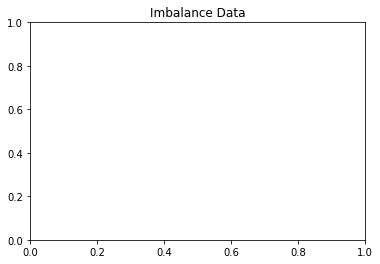

In [64]:
f1_result = []; acc_result = []
f1_train = []; acc_train = []

for i in range(10):
    # 選用best param = entropy，所以取後面20個(前20個是gini)
    f1 = clf.cv_results_.get('split{}_test_f1'.format(i))[-20:]
    acc = clf.cv_results_.get('split{}_test_accuracy'.format(i))[-20:]
    f1_tr = clf.cv_results_.get('split{}_train_f1'.format(i))[-20:]
    acc_tr = clf.cv_results_.get('split{}_train_accuracy'.format(i))[-20:]
    f1_result.append(f1)
    acc_result.append(acc)
    f1_train.append(f1_tr)
    acc_train.append(acc_tr)

f1_result_df = pd.DataFrame(f1_result)
acc_result_df = pd.DataFrame(acc_result)
f1_train_df = pd.DataFrame(f1_train)
acc_train_df = pd.DataFrame(acc_train)

# plot relation between depth and accuracy/f1-score
plt.title('Imbalance Data')
plt.plot(depth, acc_result_df.sum(axis=0)/10, color='blue')
plt.plot(depth, f1_result_df.sum(axis=0)/10, color='red')
plt.plot(depth, acc_train_df.sum(axis=0)/10, color='blue', linestyle='dashed')
plt.plot(depth, f1_train_df.sum(axis=0)/10, color='red', linestyle='dashed')
plt.xlabel('Depth')
plt.ylabel('score')
plt.xticks(depth)
plt.legend(['accuracy_val','f1-score_val','accuracy_train','f1-score_train'])
plt.show()

In [66]:
# train report
from sklearn.metrics import classification_report
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99      1172
           1       0.97      0.77      0.86        81

    accuracy                           0.98      1253
   macro avg       0.98      0.88      0.92      1253
weighted avg       0.98      0.98      0.98      1253



In [67]:
# test report: very poor on miner class '1'
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.93      0.93      0.93       291
           1       0.16      0.17      0.17        23

    accuracy                           0.87       314
   macro avg       0.55      0.55      0.55       314
weighted avg       0.88      0.87      0.88       314

